Class 0 (<=20 candies):
- Centroid (mean vector): [  3.33333333   3.         254.66666667]
- Spread (std vector): [ 1.59861051  1.52752523 84.86001545]

Class 1 (>20 candies):
- Centroid (mean vector): [  3.     3.25 247.  ]
- Spread (std vector): [ 2.12132034  1.29903811 98.24204802]

Interclass Distance (between centroids): 7.677980782008297

Mean of Mangoes (Kg): 3.20
Variance of Mangoes (Kg): 3.36


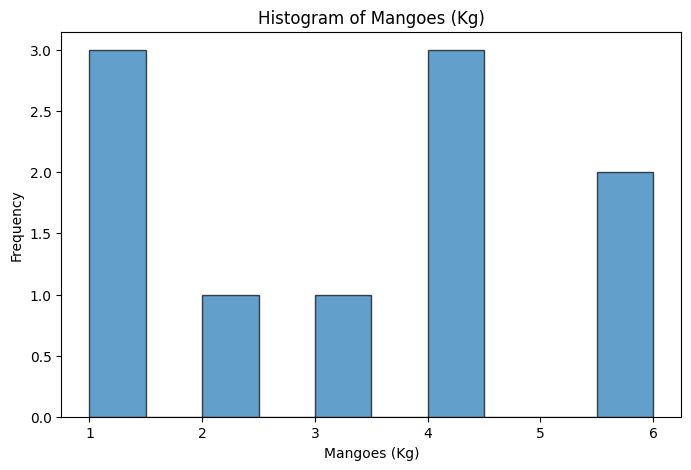

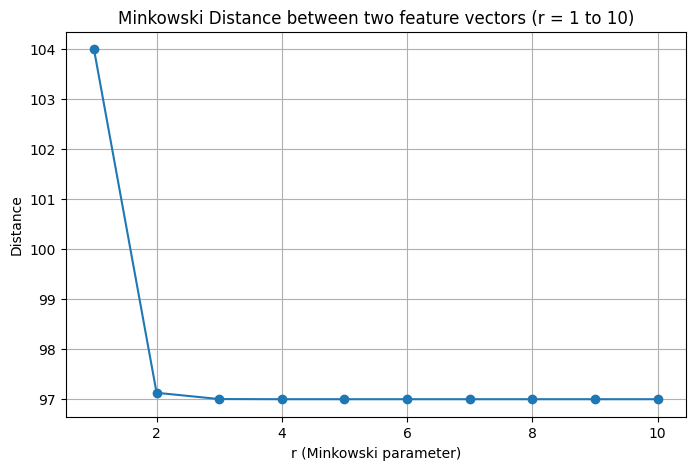

Train Features shape: (7, 3)
Test Features shape: (3, 3)
Train Labels shape: (7,)
Test Labels shape: (3,)


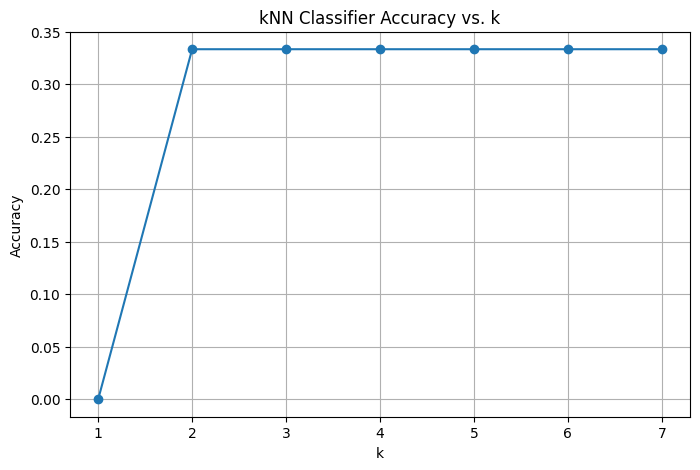

Accuracy (k=1): 0.00
Accuracy (k=3): 0.33

Confusion Matrix (Train):
[[4 1]
 [1 1]]

Classification Report (Train):

              precision    recall  f1-score   support

           0      0.800     0.800     0.800         5
           1      0.500     0.500     0.500         2

    accuracy                          0.714         7
   macro avg      0.650     0.650     0.650         7
weighted avg      0.714     0.714     0.714         7


Confusion Matrix (Test):
[[1 0]
 [2 0]]

Classification Report (Test):

              precision    recall  f1-score   support

           0      0.333     1.000     0.500         1
           1      0.000     0.000     0.000         2

    accuracy                          0.333         3
   macro avg      0.167     0.500     0.250         3
weighted avg      0.111     0.333     0.167         3


Fit assessment guideline:
- If train and test scores are both high and similar: regular fit
- If train much higher than test: overfit
- If both are low: un

e:\COLLEGE PDFS\5TH SEMESTER\Machine Learning\ML\machine-learning-lab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\COLLEGE PDFS\5TH SEMESTER\Machine Learning\ML\machine-learning-lab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
e:\COLLEGE PDFS\5TH SEMESTER\Machine Learning\ML\machine-learning-lab\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Data Loading & Preparation ---
df = pd.read_csv('E:/COLLEGE PDFS/5TH SEMESTER/Machine Learning/lab2/purchaseData.csv')
df['Class'] = (df['Candies (#)'] > 20).astype(int)
feature_cols = ['Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']
X = df[feature_cols].values
y = df['Class'].values

# --- Utility Functions ---
def get_class_features(dataframe, class_label, features):
    return dataframe[dataframe['Class'] == class_label][features].values

def centroid(features):
    return np.mean(features, axis=0)

def spread(features):
    return np.std(features, axis=0)

def centroid_distance(c1, c2):
    return np.linalg.norm(c1 - c2)

def compute_mean_variance(data, feature):
    clean_data = data[feature].dropna()
    mean = np.mean(clean_data)
    variance = np.var(clean_data)
    return mean, variance

def plot_histogram(data, feature, bins=10):
    plt.figure(figsize=(8, 5))
    plt.hist(data[feature].dropna(), bins=bins, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

def minkowski_distance(a, b, r):
    if np.isnan(a).any() or np.isnan(b).any():
        return np.nan
    diff = np.abs(a - b)
    return np.sum(diff ** r) ** (1 / r)

def knn_accuracy(Xtr, ytr, Xte, yte, k):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Xtr, ytr)
    y_pred = model.predict(Xte)
    return accuracy_score(yte, y_pred)

def evaluate_performance(y_true, y_pred, label='Dataset'):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix ({label}):\n{cm}")
    print(f"\nClassification Report ({label}):\n")
    print(classification_report(y_true, y_pred, digits=3))

# --- Main Function ---
if __name__ == "__main__":
    # --- Statistical Analysis: Centroids, Spread, Interclass Distance ---
    fclass0 = get_class_features(df, 0, feature_cols)
    fclass1 = get_class_features(df, 1, feature_cols)
    centroid0 = centroid(fclass0)
    centroid1 = centroid(fclass1)
    spread0 = spread(fclass0)
    spread1 = spread(fclass1)
    inter_dist = centroid_distance(centroid0, centroid1)
    print("Class 0 (<=20 candies):")
    print("- Centroid (mean vector):", centroid0)
    print("- Spread (std vector):", spread0)
    print()
    print("Class 1 (>20 candies):")
    print("- Centroid (mean vector):", centroid1)
    print("- Spread (std vector):", spread1)
    print()
    print("Interclass Distance (between centroids):", inter_dist)
    print()

    # --- Mean & Variance, Histogram ---
    feat = 'Mangoes (Kg)'
    mean, variance = compute_mean_variance(df, feat)
    print(f"Mean of {feat}: {mean:.2f}")
    print(f"Variance of {feat}: {variance:.2f}")
    plot_histogram(df, feat, bins=10)

    # --- Minkowski Distances Between Two Feature Vectors ---
    vec1 = df.loc[0, feature_cols].values.astype(float)
    vec2 = df.loc[1, feature_cols].values.astype(float)
    rs = list(range(1, 11))
    m_distances = [minkowski_distance(vec1, vec2, r) for r in rs]
    plt.figure(figsize=(8, 5))
    plt.plot(rs, m_distances, marker='o')
    plt.title('Minkowski Distance between two feature vectors (r = 1 to 10)')
    plt.xlabel('r (Minkowski parameter)')
    plt.ylabel('Distance')
    plt.grid(True)
    plt.show()

    # --- Train/Test Split ---
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    print("Train Features shape:", X_train.shape)
    print("Test Features shape:", X_test.shape)
    print("Train Labels shape:", y_train.shape)
    print("Test Labels shape:", y_test.shape)

    # --- kNN Classification, Accuracy Plot ---
    max_k = len(X_train)
    ks = range(1, max_k + 1)  # k from 1 up to max_k
    accs = [knn_accuracy(X_train, y_train, X_test, y_test, k) for k in ks]
    plt.figure(figsize=(8, 5))
    plt.plot(ks, accs, marker='o')
    plt.title('kNN Classifier Accuracy vs. k')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.xticks(ks)
    plt.grid(True)
    plt.show()

    acc1 = knn_accuracy(X_train, y_train, X_test, y_test, 1)
    acc3 = knn_accuracy(X_train, y_train, X_test, y_test, 3)
    print(f"Accuracy (k=1): {acc1:.2f}")
    print(f"Accuracy (k=3): {acc3:.2f}")

    # --- Final kNN Model, Predictions k=3 ---
    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # --- Performance Evaluation: Confusion Matrix, Precision, Recall, F1-score ---
    evaluate_performance(y_train, y_train_pred, label='Train')
    evaluate_performance(y_test, y_test_pred, label='Test')

    # --- Model Fit Interpretation ---
    # Print this summary guideline at the end for user's manual check
    print("\nFit assessment guideline:")
    print("- If train and test scores are both high and similar: regular fit")
    print("- If train much higher than test: overfit")
    print("- If both are low: underfit")
